In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# all columns are numerical (categorical columns have been converted) 
# predicting advanced shipping, shipping on time, late delivery
df = pd.read_csv('df_adv_ontime_late.csv')
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

#### Onehot Encoded df

In [3]:
df = df.drop(columns=[
    'Late_delivery_risk'
], axis=1)

In [4]:
df_obj = df.select_dtypes(include='object')
df_obj.drop(columns=['Delivery Status'], axis=1, inplace=True)

In [5]:
#one hot encoder
def onehotencoder(col):
    
    ohe = OneHotEncoder()
    ohe_array = ohe.fit_transform((pd.DataFrame(col))).toarray()

    feature_labels = np.array(ohe.categories_).ravel()


    df_obj = pd.DataFrame(ohe_array, columns=feature_labels)
    
    return df_obj

In [6]:
df_ohe = pd.DataFrame()
for c in df_obj.columns:
    one_hot = onehotencoder(df_obj[c])
    df_ohe = pd.concat([df_ohe, one_hot], axis=1) 

In [7]:
df_cont_var = df.select_dtypes(exclude='object')

In [8]:
df_ohe = pd.concat([df_cont_var, df_ohe], axis=1)

In [9]:
df_ohe = pd.concat([df_ohe, df['Delivery Status'] ], axis=1)

In [10]:
df=df_ohe

In [11]:
# y variable values set equal to label encode the dataframes column being used for y
le = LabelEncoder()
y = le.fit_transform(df['Delivery Status'])

In [12]:
# x variable
X = df.drop(columns=['Delivery Status'], axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2)

### XGBoost Model

In [14]:
# scaling data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [15]:
scaler_x_train = scaler.transform(X_train)
scaler_x_test = scaler.transform(X_test)

In [16]:
xgb = XGBClassifier(eval_metric='mlogloss')
xgb.fit(scaler_x_train, y_train)
xgb_pred_train = xgb.predict(scaler_x_train)

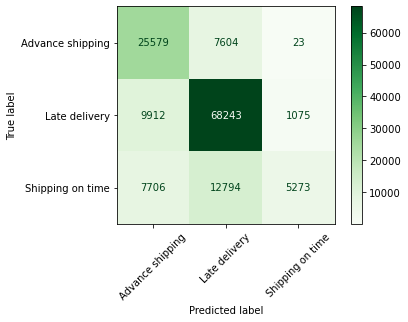

In [17]:
plot_confusion_matrix(xgb, scaler_x_train, y_train,
                      cmap=plt.cm.Greens)

plt.xticks(ticks=range(0,len(le.classes_)),labels=le.classes_, rotation=45)
plt.yticks(ticks=range(0,len(le.classes_)),labels=le.classes_)

plt.show()

In [18]:
print(classification_report(y_train, xgb_pred_train, target_names=le.classes_))

                  precision    recall  f1-score   support

Advance shipping       0.59      0.77      0.67     33206
   Late delivery       0.77      0.86      0.81     79230
Shipping on time       0.83      0.20      0.33     25773

        accuracy                           0.72    138209
       macro avg       0.73      0.61      0.60    138209
    weighted avg       0.74      0.72      0.69    138209



In [19]:
xgb_pred_test = xgb.predict(scaler_x_test)

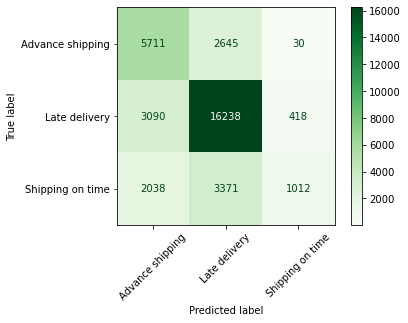

In [20]:
plot_confusion_matrix(xgb, scaler_x_test, y_test,
                      cmap=plt.cm.Greens)

plt.xticks(ticks=range(0,len(le.classes_)),labels=le.classes_, rotation=45)
plt.yticks(ticks=range(0,len(le.classes_)),labels=le.classes_)

plt.show()

In [21]:
print(classification_report(y_test, xgb_pred_test, target_names=le.classes_))

                  precision    recall  f1-score   support

Advance shipping       0.53      0.68      0.59      8386
   Late delivery       0.73      0.82      0.77     19746
Shipping on time       0.69      0.16      0.26      6421

        accuracy                           0.66     34553
       macro avg       0.65      0.55      0.54     34553
    weighted avg       0.67      0.66      0.63     34553



In [22]:
#.66 before dropped corr columns
#.65 after corr difference

In [23]:
#.66 before delivery status change
#.74 after deilivery status change